#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Practica 1 </font>

##### <font color="#03997A"> Temas 1, 2 y 3: Agrupamiento / Clustering con el método K-means, Hierarchical clustering, GMM Models
##### Alumno: Ibarra Ramírez Sergio </font>

In [16]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn as sns


#### 1. Con ayuda de las bibliotecas mostradas en la sesión (numpy, pandas, matplotlib y otras), implementar el algoritmo de K-means

Se importa la data para aplicar el algortimo K-means

In [2]:
data_k_means = np.array([[8, 10], [3, 10.5], [7, 13.5], [5, 18], [5, 13], [6, 9], [9, 11], [3, 18], [8.5, 12], [8, 16]])
Centroides_k_means = np.array([[8, 10], [3, 10.5]])

Se muestra el algortimo K-means compuesto de tres ciclos 
Dados unos valores iniciales de Centroides_k_means
Ciclo a. Calcula la distancia de cada punto en el dataset a cada centroide[i] y asigna ese punto al centroide[i] más cercano
Ciclo b. Dadas la 'configuración' de puntos y su centroide calcula el nuevo centroide como la media de los puntos asociados a él
Ciclo c. Repite el Ciclo a y Ciclo b hasta que la diferencia en los centroides calculados en Ciclo b de un paso a otro sea menor a un threshold establecido 


In [3]:
## Calcula la distancia de cada punto con el otro
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Initial centroids
prev_C = Centroides_k_means.copy()

while True:
    ##Inicializamos arrays de distancias y de clusters
    distances = []
    clusters = np.zeros(len(data_k_means))


    ## Para cada punto en el array data
    for i in range(len(data_k_means)):
        ## Calcula la distancia del i-esimo punto al centroide C return np.linalg.norm(a - b, axis=ax)
        distance = dist(data_k_means[i], Centroides_k_means)
        ##Guarda todas esas distancias en un array para cada punto en array de arrays de distancias, llamado distances
        distances.append(distance)
        ## Asig una un cluster para cada distancia, como la minima distancia de cada array
        cluster = np.argmin(distance)
        ## Se guarda cada cluster de cada punti i en el array de clusters 
        clusters[i] = cluster

        ## Para cada punto dentro de nuestros Centroides
    for i in range(len(Centroides_k_means)):
        ## Le asigna a cada punto su centroide en caso en que clusters[j] == i  
        points = [data_k_means[j] for j in range(len(data_k_means)) if clusters[j] == i]
        ## El controide es la distancia media de todos los puntos 
        Centroides_k_means[i] = np.mean(points, axis=0)



   ### Actualiza los centroides si la difernecia entre sus distancias es mayor a un threshold definido 
    if np.linalg.norm(Centroides_k_means - prev_C) <= 0.001:
        break


    ## Atualiza el valor de C[i-1] como el calulado en el respectivo ciclo 
    prev_C = Centroides_k_means.copy()

print("Final centroids:")
print(Centroides_k_means)

Final centroids:
[[ 7.75       11.91666667]
 [ 4.         14.875     ]]


#### 2. Seleccione un criterio de enlazamiento para el caso del agrupamiento aglomerativo e implementarlo usando las bibliotecas mencionadas anteriormente

Vamos a importar la data de iris para trabajar con ella y aplicar Hierarchical clustering con diferentes funciones link 

In [1]:
from sklearn.datasets import load_iris
tabla_iris = load_iris(as_frame=True)
tabla_iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Debido a que Hierarchical clustering es un método NO supervisado, debemos tener un dataset 'que no contengan la variable objetivo'

In [3]:
y_iris = tabla_iris.frame["target"]
X_iris = tabla_iris.frame.drop(["target"],axis=1)
X_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Vamos a normalizar los datos para tener una misma escala 

In [4]:
from numpy.linalg import norm
from sklearn.preprocessing import normalize
iris_jerarquico_scaled = normalize(X_iris)
iris_jerarquico_scaled

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

Vamos a formar un DataFrame con la data ya 'normalizada'

In [6]:
frame_iris_jerarquico_scaled = pd.DataFrame(iris_jerarquico_scaled, columns=X_iris.columns)

frame_iris_jerarquico_scaled.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784


Vamos a aplicar el modelo jerarquico, graficar el dendograma de clasificaicón y obtener el n_clusters 'óptimo' según el algoritmo scipy.cluster.hierarchy 

##### Primero probaremos el modelo jerarquico para iris con Linkage: 'Ward'

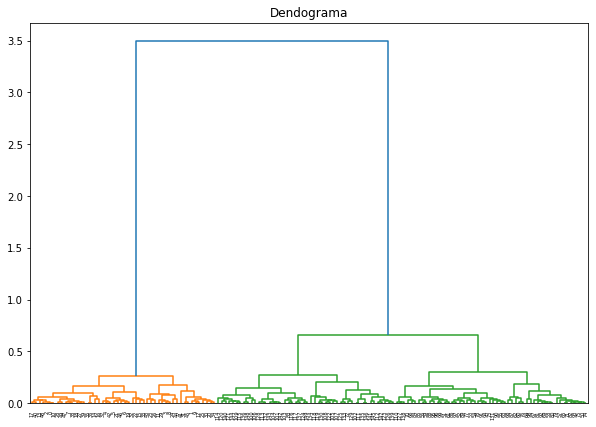

In [7]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title('Dendograma')
dendograma_iris_jerarquico_ward = sch.dendrogram(sch.linkage(frame_iris_jerarquico_scaled,method='ward'))

Acorde al modelo modelo jerarquico para iris con Linkage: 'Ward' el número 'óptimo' de clusters sería de 2, sin embargo, se sabe que la base de iris contiene información de 3 tipos de flores no de 2. Aún así en la base del dendograma se puedne notar que el modelo si identifica 3 grupos  

##### Ahora vamos a usar modelo AgglomerativeClustering con el linkage function WARD, pero tomando el n_clusters = 3

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster_iris_jerarquico_ward = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_iris_jerarquico_ward_result = cluster_iris_jerarquico_ward.fit_predict(frame_iris_jerarquico_scaled)
cluster_iris_jerarquico_ward_result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

Vamos a evaluar el resultado de la clasificación usando el modelo AgglomerativeClustering con el linkage function WARD, tomando el n_clusters = 3

Primero con la matriz de confusión

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix_cluster_iris_jerarquico_ward = confusion_matrix(y_iris,cluster_iris_jerarquico_ward_result)

In [19]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_cluster_iris_jerarquico_ward = pd.DataFrame(confusion_matrix_cluster_iris_jerarquico_ward,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

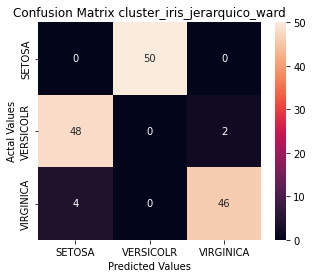

In [20]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_cluster_iris_jerarquico_ward, annot=True)
plt.title('Confusion Matrix cluster_iris_jerarquico_ward')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Exactitud del resultado de la clasificación usando el modelo AgglomerativeClustering con el linkage function WARD, tomando el n_clusters = 3

Que nos muestra que solo el ~30% de los datos fueron clasificados correctamente (Solamente los de Virginica)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_iris,cluster_iris_jerarquico_ward_result)

0.30666666666666664

Presición del resultado de la clasificación usando el modelo AgglomerativeClustering con el linkage function WARD, tomando el n_clusters = 3
Que muestra solo ~30% de Positivos identificados correctamente ((Solamente los de Virginica))

In [14]:
from sklearn.metrics import precision_score

precision_score(y_iris, cluster_iris_jerarquico_ward_result, average='macro')

0.3194444444444445

##### Ahora vamos a usar modelo AgglomerativeClustering con el linkage function AVERAGE, pero tomando el n_clusters = 3

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster_iris_jerarquico_average = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster_iris_jerarquico_average_result = cluster_iris_jerarquico_average.fit_predict(frame_iris_jerarquico_scaled)
cluster_iris_jerarquico_average_result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Vamos a evaluar el resultado de la clasificación usando el modelo AgglomerativeClustering con el linkage function AVERAGE, tomando el n_clusters = 3

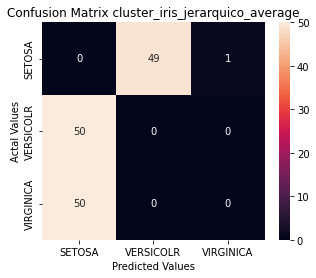

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix_cluster_iris_jerarquico_average = confusion_matrix(y_iris,cluster_iris_jerarquico_average_result)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_cluster_iris_jerarquico_average = pd.DataFrame(confusion_matrix_cluster_iris_jerarquico_average,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])


#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_cluster_iris_jerarquico_average, annot=True)
plt.title('Confusion Matrix cluster_iris_jerarquico_average')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Exactitud del resultado de la clasificación usando el modelo AgglomerativeClustering con el linkage function AVERAGE, tomando el n_clusters = 3. Que nos indica que ninguna flor fue clasificada correctamente 

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_iris,cluster_iris_jerarquico_average_result)

0.0